In [1]:
import pandas as pd
import numpy as np
import preprocessingFuncts as pp
from sklearn import neighbors
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

In [2]:
#all base datas

def readData(paths, base='', categories=[]):
  arr = []
  itemData = pp.readItemData()
  userData = pp.readUserData()
  for path in paths:
    ratingData = pp.readRatingData(path)
    data = 0
    if base == "user":
      data = pp.specifyByUserData(userData, ratingData, categories)
    elif base == "item":
      data = pp.specifyByItemData(itemData, ratingData, categories)
    else:
      data = ratingData
    data = data.dropna()
    y = data.loc[:, 'rating']
    x = data.copy()
    x = x.drop(['rating'], axis='columns')
    arr.append({'x': x, 'y': y, 'name': path[8:10], 'type': path[-4:]})
  return arr

In [3]:
from models import CF

#Creating the model & training it
UBCF = CF('user')
UBCF.fit('ml-100k\\ua.base')

user_id  1    2    3    4    5    6    7    8    9    10   ...  934  935  936  \
item_id                                                    ...                  
1        5.0  4.0  NaN  NaN  NaN  4.0  NaN  NaN  NaN  4.0  ...  2.0  3.0  4.0   
2        3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  4.0  NaN  NaN   
3        4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  4.0   
4        3.0  NaN  NaN  NaN  NaN  NaN  5.0  NaN  NaN  4.0  ...  5.0  NaN  NaN   
5        3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1678     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1679     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1680     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1681     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1682     NaN  NaN  NaN  NaN 

In [4]:
#Viewing the data matrix
UBCF.dataMatrix

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
1,5.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
UBCF.simMatrix

,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
1,1.000000,NaN,NaN,NaN,0.394945,0.300065,0.280768,NaN,NaN,-0.105144,...,0.024319,NaN,0.419777,NaN,0.316224,NaN,0.32037,NaN,NaN,0.110617
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.394945,NaN,NaN,NaN,1.000000,0.250290,0.198398,NaN,NaN,0.026015,...,0.231196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
940,0.320370,NaN,NaN,NaN,NaN,-0.049325,0.023486,NaN,NaN,0.179605,...,-0.158268,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
942,NaN,NaN,NaN,NaN,NaN,0.053060,0.453177,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [6]:
#Making ratings prediction

testData = pp.readRatingData('ml-100k\\ua.test')
testX, testY =  testData.loc[:,['user_id','item_id']],testData.loc[:,'rating']

predY = UBCF.predict(testX)
print(predY)

[4, 4, 4, 3, 2, 4, 4, 5, 4, 4, 3, 4, 5, 3, 3, 3, 4, 4, 3, 1, 5, 3, 3, 5, 3, 5, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 4, 2, 2, 3, 1, 1, 2, 4, 5, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 5, 4, 5, 5, 4, 5, 4, 4, 4, 3, 2, 3, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 5, 5, 4, 4, 4, 5, 4, 3, 2, 4, 3, 4, 4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 3, 4, 3, 4, 5, 4, 4, 5, 4, 4, 3, 4, 3, 4, 2, 3, 3, 3, 5, 4, 5, 5, 4, 4, 5, 5, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 3, 5, 4, 4, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 5, 3, 3, 4, 4, 4, 3, 2, 2, 4, 4, 3, 3, 2, 2, 4, 4, 2, 3, 3, 4, 4, 4, 2, 1, 4, 5, 3, 4, 3, 4, 4, 3, 4, 3, 4, 4, 3, 5, 4, 4, 5, 4, 3, 5, 4, 4, 2, 4, 5, 4, 4, 5, 4, 5, 5, 3, 4, 4, 4, 4, 3, 4, 4, 4, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 5, 3, 4, 3, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [7]:
from sklearn.metrics import classification_report

print(classification_report(testY, predY))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.22      0.03      0.05       542
           2       0.20      0.10      0.14       995
           3       0.34      0.28      0.31      2424
           4       0.39      0.35      0.37      3316
           5       0.47      0.12      0.20      2153

    accuracy                           0.23      9430
   macro avg       0.27      0.15      0.18      9430
weighted avg       0.37      0.23      0.27      9430



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


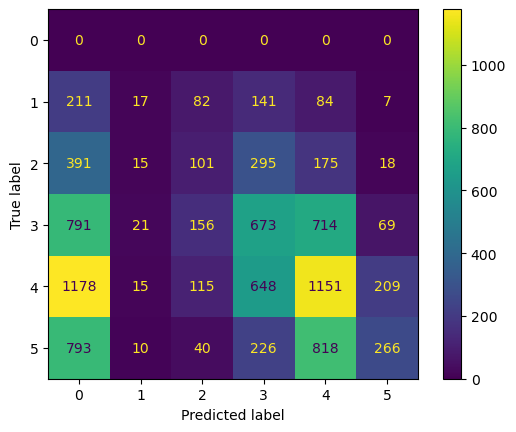

In [8]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(
    testY,predY, labels = [0,1,2,3,4,5]
)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2,3,4,5])
disp.plot()
plt.show()

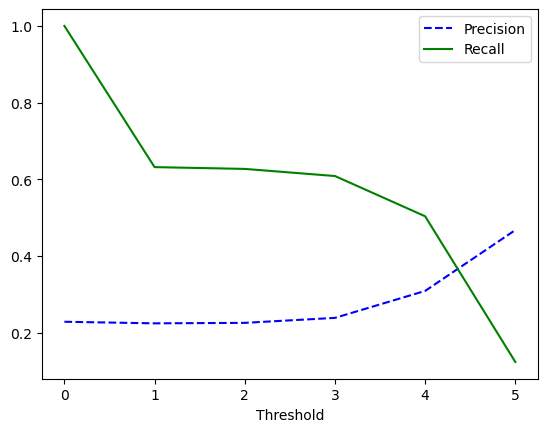

In [9]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(
    testY, predY, pos_label=5)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.legend()
plt.xlabel("Threshold")
plt.show()


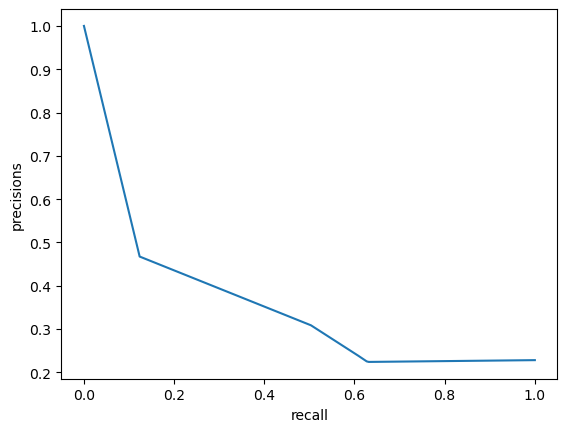

In [10]:
plt.plot(recalls,precisions)
plt.ylabel("precisions")
plt.xlabel("recall")
plt.show()

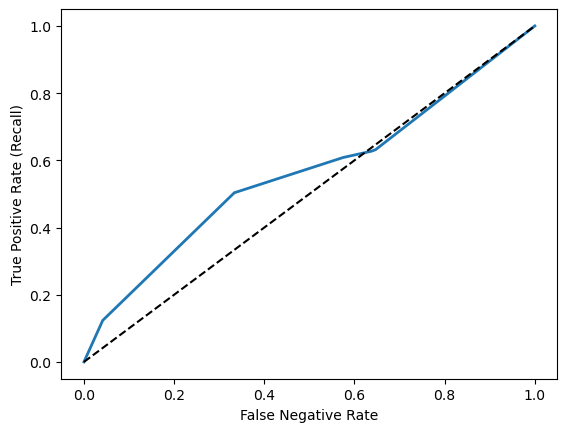

In [11]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(testY, predY, pos_label=5)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel("True Positive Rate (Recall)")
plt.xlabel("False Negative Rate")
plt.show()